# Signal Detection Using Templates and Statistics
Elizabeth Kapelevich

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import interpolate

## Part I: PPT Slides
* Gravity
* General Relativity
* Gravitational Waves

## Part II: Demo
* Write a function returning `t, y` of a sine-gaussian wave
* Plot the default sine-gaussian wave
* Plot different sine-gaussian waves with different values of `a, f,` and $\sigma$ so audience understands how parameters affect wave
* Generate random noise
* Plot the random noise
* Plot the wave on top of the random noise and make the wave an obvious color so audience can see it
* Remove the obvious color so the wave is more difficult to find for the audience
* Show how increasing the amplitude of the noise can completely bury the wave so it's not visible
* Create the `integrator` and `cross_correlation` function
* Make an animation of the `cross_correlation` function sliding with the template across the noise to find the wave
* Plot the `cross_correlation` result and show that the peak is where the wave is found
* Show how changing parameters will affect the peak of `cross_correlation`

In [5]:
def sine_gaussian(signal_amplitude, frequency, sigma, time_interval, t_start, t_end):
    
    """
    This function takes as input the amplitude,
    frequency, standard deviation, interval of
    time, and the bounds of time.
    
    INPUT:
    ------
    amplitude : amplitude
    frequency : frequency
    sigma : standard deviation
    time_interval : interval of time between each value
    t_start : initial time
    t_end : final time
    
    RETURNS:
    --------
    The time series for a wave of a sine-gaussian 
    function.
    """
    
    t_duration = t_end - t_start                                   # calculating duration of time
    time_stamps = t_duration / time_interval                       # finding number of time-stamps
    delta_T = t_duration / math.ceil(time_stamps)                  # creating new time intervals to allow array to reach end point

    t = np.arange(t_start, t_end + delta_T, delta_T)               # setting up array from initial to final time in increments of delta t
    t_mean = (t_start + t_end) / 2                                 # finding mean of time for sine-gaussian equation
    
    S = signal_amplitude*np.sin(2*np.pi*frequency*t)*np.exp((-(t - t_mean)**2)/(2*sigma)) # sine-gaussian equation

    return t, S, delta_T

In [6]:
signal_amplitude = 1
frequency = 2
sigma = 0.1
time_interval = 0.012
t_start = 5
t_end = 7
time_wave, wave, interval = sine_gaussian(signal_amplitude, frequency, sigma, time_interval, t_start, t_end)

Text(0.5, 1.0, 'Sine Gaussian Wave')

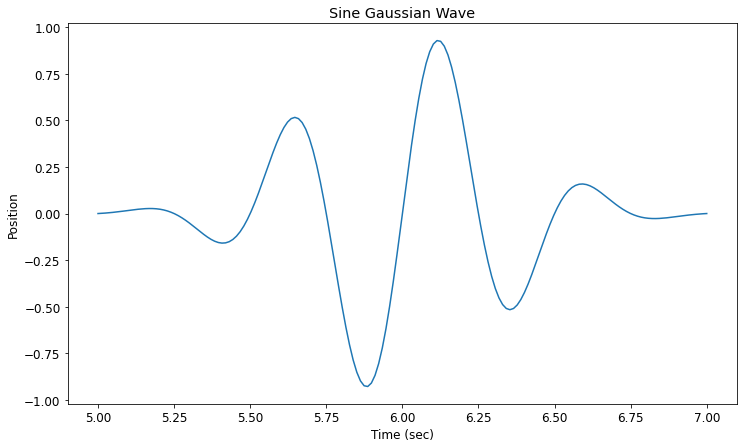

In [7]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(12,7))
plt.plot(time_wave, wave)
plt.xlabel("Time (sec)")
plt.ylabel("Position")
plt.title("Sine Gaussian Wave")

In [9]:
signal_amplitude = 10
frequency = 2
sigma = 0.1
time_interval = 0.012
t_start = 5
t_end = 7
time_wave, wave, interval = sine_gaussian(signal_amplitude, frequency, sigma, time_interval, t_start, t_end)

Text(0.5, 1.0, 'Sine Gaussian Wave With 10x Amplitude')

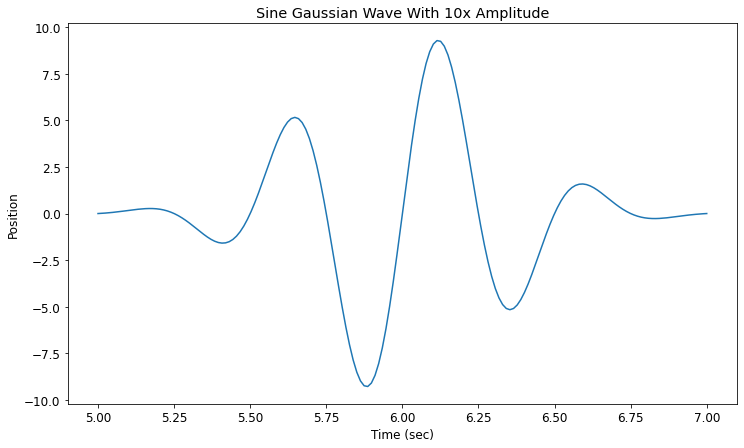

In [10]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(12,7))
plt.plot(time_wave, wave)
plt.xlabel("Time (sec)")
plt.ylabel("Position")
plt.title("Sine Gaussian Wave With 10x Amplitude")

In [12]:
signal_amplitude = 1
frequency = 6
sigma = 0.1
time_interval = 0.012
t_start = 5
t_end = 7
time_wave, wave, interval = sine_gaussian(signal_amplitude, frequency, sigma, time_interval, t_start, t_end)

Text(0.5, 1.0, 'Sine Gaussian Wave With 3x Frequency')

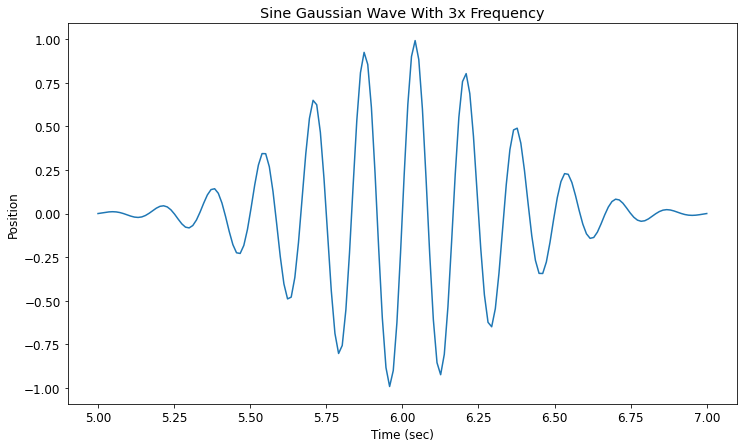

In [13]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(12,7))
plt.plot(time_wave, wave)
plt.xlabel("Time (sec)")
plt.ylabel("Position")
plt.title("Sine Gaussian Wave With 3x Frequency")

In [15]:
signal_amplitude = 1
frequency = 2
sigma = 1
time_interval = 0.012
t_start = 5
t_end = 7
time_wave, wave, interval = sine_gaussian(signal_amplitude, frequency, sigma, time_interval, t_start, t_end)

Text(0.5, 1.0, 'Sine Gaussian Wave With 10x Sigma')

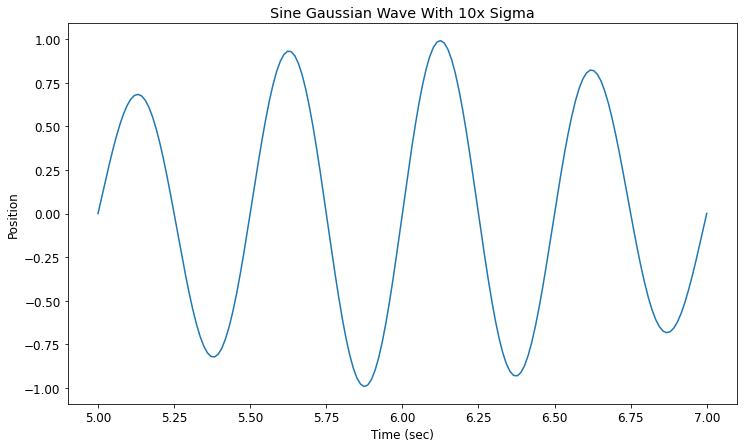

In [16]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(12,7))
plt.plot(time_wave, wave)
plt.xlabel("Time (sec)")
plt.ylabel("Position")
plt.title("Sine Gaussian Wave With 10x Sigma")

In [17]:
def noise_function(noise_amplitude, t_start, t_end, time_interval):
    """
    This function will take as input the boundaries of a time stamp
    from some noise and the interval between each value.
    
    INPUT:
    ------
    t_0 : start time of noise
    t_end : end time of noise
    interval : interval of time between each value
    
    RETURNS:
    --------
    The time series for random noise.
    
    """
    t_duration = t_end - t_start                          # calculating duration of time
    time_stamps = t_duration / time_interval              # finding number of time-stamps
    delta_T = t_duration / math.ceil(time_stamps)         # creating new time intervals to allow array to reach end point

    t = np.arange(t_start, t_end + delta_T, delta_T)      # setting up array from initial to final time in increments of delta t
    
    noise = noise_amplitude*(-1 + 2 * np.random.random(len(t)))             # random values with same length as t
    
    return t, noise, delta_T

In [20]:
noise_amplitude = 1
t_start = 0
t_end = 10
time_interval = 0.0088
time_noise, noise, delta_T = noise_function(noise_amplitude, t_start, t_end, time_interval)

Text(0.5, 1.0, 'Random Noise')

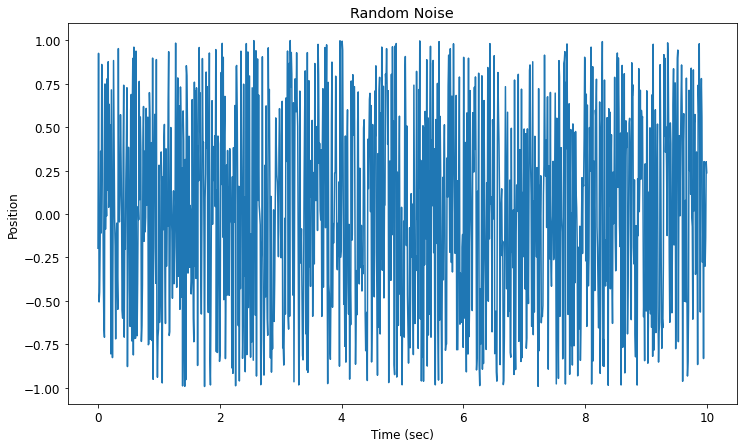

In [21]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(12,7))
plt.plot(time_noise, noise)
plt.xlabel("Time (sec)")
plt.ylabel("Position")
plt.title("Random Noise")

In [22]:
def finaldata(data_amplitude, frequency, sigma, time_interval, signal_start, signal_end, noise_amplitude, noise_start, noise_end):
    """
    This function will take as input the amplitude, time boundaries
    of the signal and noise, interval between their values, the
    frequency, and standard deviation.
    
    INPUT:
    ------
    amplitude : amplitude
    frequency : frequency
    sigma : standard deviation
    time_interval : interval of time between each value
    signal_start : start time of signal
    signal_end : end time of signal
    noise_start : start time of noise
    noise_end : end time of noise
    
    RETURNS:
    --------
    The times and positions of signal and noise combined.
    """
    
    time_signal, signal_values, signal_interval = sine_gaussian(signal_amplitude, frequency, sigma, 
                                                                time_interval, signal_start, signal_end)
    time_noise, noise_values, noise_interval = noise_function(noise_amplitude, noise_start, noise_end, time_interval)
    
    s = interpolate.interp1d(time_signal, signal_values)
    
    index1 = time_noise > time_signal[0]                          # boolean = False before signal in noise time-series
    index2 = time_noise < time_signal[-1]                         # boolean = False after signal in noise time-series
    time_intersect = index1*index2                                # multiplying arrays into one array of booleans
    
    zeroes = np.zeros_like(noise_values)                          # create an array of zeroes same length as noise values
    signal_time_stamps = time_noise[time_intersect]
    signal = s(signal_time_stamps)                                # interpolating signal time stamps onto signal values

    data_in_signal = noise_values[time_intersect] + signal        # embedding signal in noise
    data_before_signal = noise_values[index2*(~time_intersect)]   # prepping to graph noise before signal
    data_after_signal = noise_values[index1*(~time_intersect)]    # prepping to graph noise after signal

    alldata = np.hstack((data_before_signal, data_in_signal, data_after_signal)) # combining the three arrays
    
    return (time_noise, alldata)

In [24]:
data_amplitude = 1
noise_amplitude = 1
signal_start = 5
signal_end = 7
noise_start = 0
noise_end = 10
time_interval = 0.012
frequency = 2
sigma = 0.1
times, alldata = finaldata(data_amplitude, frequency, sigma, time_interval, signal_start, signal_end, noise_amplitude, noise_start, noise_end)

Text(0.5, 1.0, 'Setting Signal on Top of Noise')

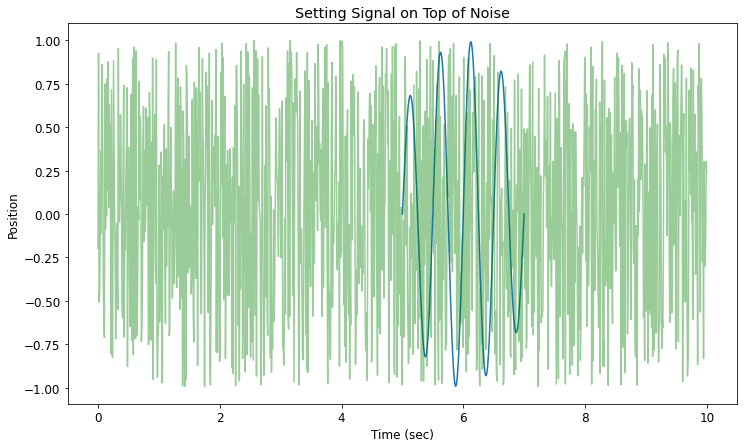

In [25]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(12,7))
plt.plot(time_wave, wave)
plt.plot(time_noise, noise, 'green', alpha=0.4)
plt.xlabel("Time (sec)")
plt.ylabel("Position")
plt.title("Setting Signal on Top of Noise")

Text(0.5, 1.0, 'Embedding Signal Within Noise Using Markers')

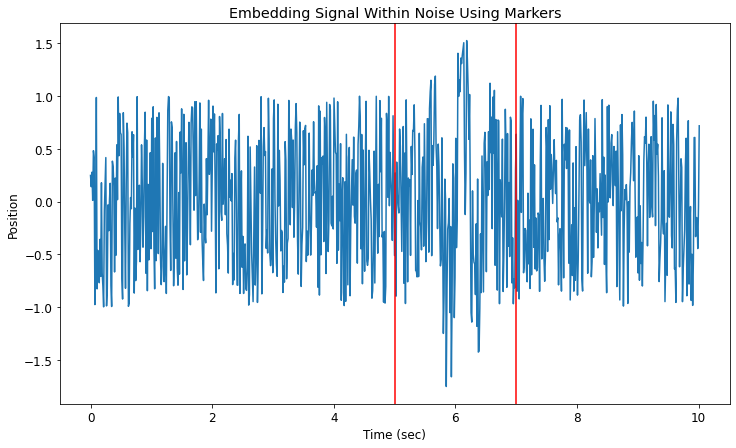

In [26]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(12,7))
plt.plot(times, alldata)
ax = plt.gca()
ylim = ax.get_ylim()
plt.plot([5, 5], ylim, 'r-')
plt.plot([7, 7], ylim, 'r-')
plt.ylim(ylim)
plt.xlabel("Time (sec)")
plt.ylabel("Position")
plt.title("Embedding Signal Within Noise Using Markers")

Text(0.5, 1.0, 'Embedding Signal Within Noise')

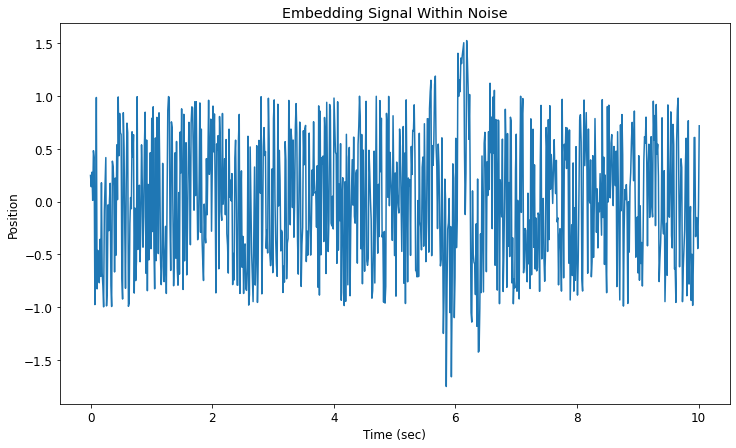

In [27]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(12,7))
plt.plot(times, alldata)
plt.xlabel("Time (sec)")
plt.ylabel("Position")
plt.title("Embedding Signal Within Noise")

In [31]:
data_amplitude = 0.5
noise_amplitude = 1
signal_start = 5
signal_end = 7
noise_start = 0
noise_end = 10
time_interval = 0.012
frequency = 2
sigma = 0.1
times, alldata = finaldata(data_amplitude, frequency, sigma, time_interval, signal_start, signal_end, noise_amplitude, noise_start, noise_end)

Text(0.5, 1.0, 'Embedding Signal Within Noise With Half the Amplitude')

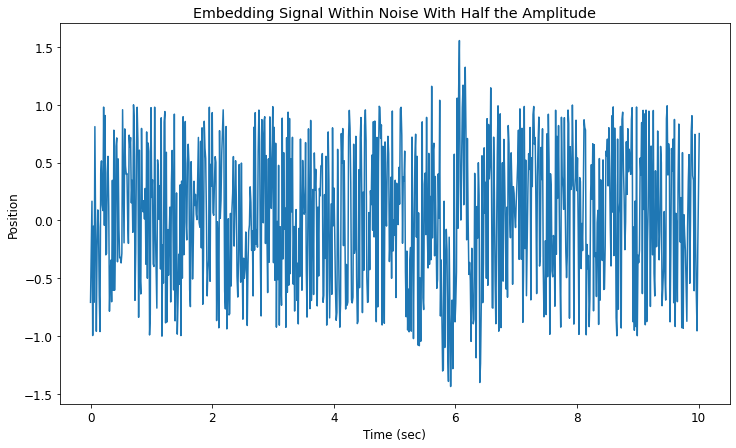

In [32]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(12,7))
plt.plot(times, alldata)
plt.xlabel("Time (sec)")
plt.ylabel("Position")
plt.title("Embedding Signal Within Noise With Half the Amplitude")

In [33]:
def template(data_amplitude, frequency, sigma, t_start, t_duration, data_time_stamps, ad_hoc_grid = 10000):
    
    """
    This function will take as input the frequency, standard
    deviation, initial time, duration time, and interval
    of time between each value.
    
    INPUT:
    ------
    amplitude : amplitude
    frequency : array of frequencies
    sigma : array of standard deviations
    t_start : start time of a signal
    t_duration : duration of time for the signal
    data_time_stamps : time stamps from the data
    
    RETURNS:
    --------
    A template that will match the given signal.

    """
    
    del_T_data = np.diff(data_time_stamps)[0]                                # finding interval between values
    t_end = t_duration + t_start
    time_stamps = np.linspace(t_start, t_end + del_T_data, ad_hoc_grid)      # creating array of values with random step-size
    
    t_mean = np.mean(time_stamps)

    S = data_amplitude*np.sin(2*np.pi*frequency*time_stamps)*np.exp((-(time_stamps - t_mean)**2)/(2*sigma)) # evaluation in ad-hoc grid
    
    s = interpolate.interp1d(time_stamps, S)                     # prepping interp. in time-stamps of data-grid
    Template = s(data_time_stamps[(data_time_stamps >= t_start)*(data_time_stamps <= t_end)]) # interpolating

    template_series = np.zeros_like(data_time_stamps)            # template time-stamps same length as data time-stamps

    index_prefix = template_series[data_time_stamps < t_start]   # zero-padding template on the left side
    index_suffix = template_series[data_time_stamps > t_end]     # zero-padding template on the right side

    closest_to_tstart = data_time_stamps[np.argmin(np.abs(t_start - data_time_stamps))] # approximating min value near start
    closest_to_tend = data_time_stamps[np.argmin(np.abs(t_end - data_time_stamps))]     # approximating min value near end

    return np.hstack((index_prefix, Template, index_suffix))     # horizontally stacking zero-padding with template

In [37]:
data_amplitude = 1
frequency = 2
sigma = 0.1
this_template = template(data_amplitude, frequency, sigma, 5, 2, times)

(-1.5839141820649738, 1.7024905513434387)

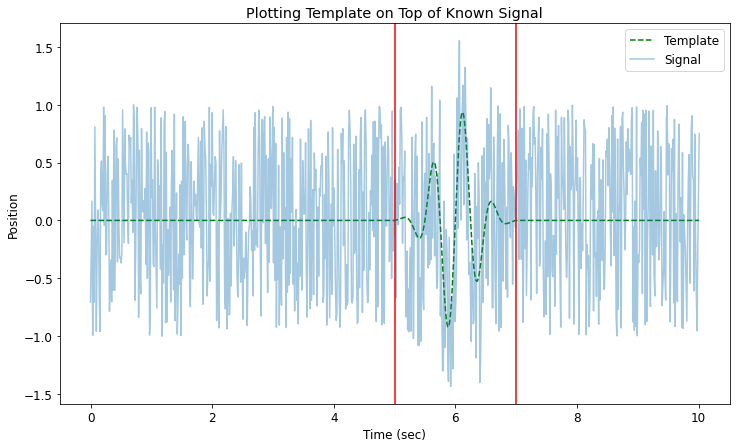

In [38]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(12,7))
plt.plot(times, this_template, 'g--', label = "Template")
plt.plot(times, alldata, alpha = 0.4, label = "Signal")
plt.xlabel("Time (sec)")
plt.ylabel("Position")
plt.title("Plotting Template on Top of Known Signal")
plt.legend()
ax = plt.gca()
ylim = ax.get_ylim()
plt.plot([5, 5], ylim, 'r-')
plt.plot([7, 7], ylim, 'r-')
plt.ylim(ylim)

In [47]:
def integrator(data_amplitude, frequency, sigma, t_start, t_duration, time_interval, data_time_series):

    """
    This function will take as input the amplitude, an array 
    of frequencies, standard deviation, initial time, duration 
    time, interval of time between each value, and the array 
    of data plus the time stamps. 

    Note that the data_time_series parameter may be a different
    size array from data_time_stamps.

    INPUT:
    ------
    amplitude : amplitude
    frequency : array of frequencies
    sigma : array of standard deviations
    t_start : start time of a signal
    t_duration : duration of time for the signal
    time_interval : interval of time between each value
    data_time_series : data plus the time stamps

    RETURNS:
    --------
    Integration results between the time series 
    of the template and the data.
    
    """
    
    temp = template(data_amplitude, frequency, sigma, t_start, t_duration, data_time_series[0]) # an array of zero-padded templates
    
    return np.sum(data_time_series[1] * temp) * time_interval                    # integrating over all templates in increments of del_T

In [48]:
def cross_correlation(data_amplitude, frequency, sigma, t_start, t_max, t_duration, time_interval, delta_T_prime, data_time_series):

    """
    This function will take as input the interval of time between
    each value, the bounds of signal time, the array of times for 
    the data, the array of frequencies and standard deviations, 
    and the duration of time for the template.
    
    INPUT:
    ------
    amplitude : amplitude
    frequency : array of frequencies
    sigma : array of standard deviations
    t_start : initial value of the time array 
    t_max : last value of the time array
    t_duration : duration of time for the signal
    time_interval : interval of time between each value
    delta_T_prime : interval of time for the template
    data_time_series : array of times for the data
    
    RETURNS:
    --------
    An array of times and integration results for all values 
    in the range.
    
    """

    C = []                                         # initializing the value of the variable
    time_stamps = []                               # creating empty list to save values for plotting
    
    while t_start <= t_max:
        time_stamps.append(t_start)
        
        integ = integrator(data_amplitude, frequency, sigma, t_start, t_duration, time_interval, data_time_series)
        C.append(integ)                            # computing integral over all 'sections'
        
        t_start += delta_T_prime                         # moving intial time of template over increments of del_T
        
    return time_stamps, C                          # returning list of times and cross-correlation values`

In [49]:
data_amplitude = 1
frequency = 2
sigma = 0.1
t_start = 0
t_max = 10
t_duration = 2
time_interval = 0.012
delta_T_prime = 0.012
data_time_series = [times, alldata]
time_crosscorr, crosscorr_values = cross_correlation(data_amplitude, frequency, sigma, 
                            t_start, t_max, t_duration, time_interval, delta_T_prime, data_time_series)

Text(0.5, 1.0, 'Finding Signal in Noise Using Template Sliding and Statistics')

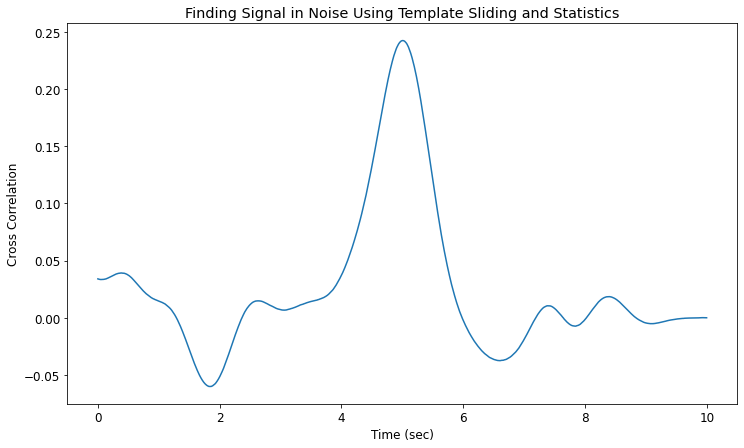

In [50]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(12,7))
plt.plot(time_crosscorr, crosscorr_values)
plt.xlabel("Time (sec)")
plt.ylabel("Cross Correlation")
plt.title("Finding Signal in Noise Using Template Sliding and Statistics")